In [ ]:

# We are innundated with all kinds of data coming to us from all kinds of different systems and sources.
# What if we flew some drones over a solar farm, the drones capture data, and that data ends up in a report that
# is close to 1,000 pages. The report will probably have some very valuable information in it, but that's a lot 
# of pages for ahuman to read through! 

# Let's create a solution to scan for key terms that indicate risk, and it can't be a simple
# exercise of finding key words (CTRL+F) because we know generally what to search for, but not specifically what to 
# search for. We need to define risk terms, and then both search for these terms as well as terms somewhat similar
# to these risk terms, but perhaps the text is slightly different.


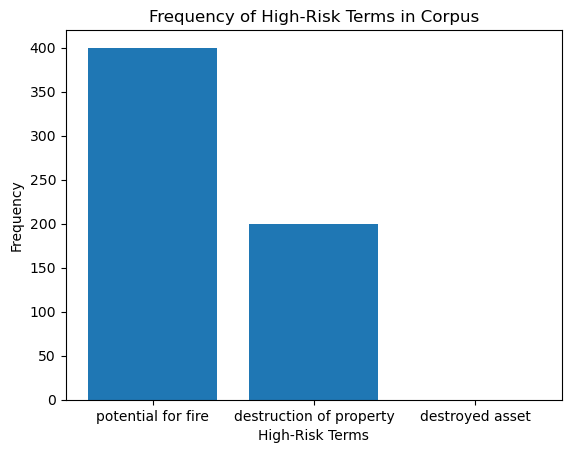

In [1]:


import random
import lorem

solar_corpus = [
    "The solar farm consists of photovoltaic panels that convert sunlight into electricity.",
    "Renewable energy from the solar farm powers nearby homes and businesses.",
    "The potential for fire in solar farms is minimized by advanced safety measures.",
    "The asset could be destroyed severely if a fire breaks out and damages the property",
    "Efficient solar energy generation is crucial for a sustainable future.",
    "The solar panels are designed to withstand various weather conditions.",
    "Continuous monitoring ensures the optimal performance of the solar energy farm.",
    "The solar farm contributes to reducing carbon emissions and environmental impact.",
    "Technological advancements improve the efficiency of solar power generation.",
    "The destruction of property in a solar farm is a rare occurrence due to robust security measures.",
    "The solar energy generation farm plays a key role in the region's energy independence.",
    "The drone found a potential for fire if the solar panels heat to excessive levels"
]

# Combine multiple sentences to form a larger corpus
solar_corpus_extended = solar_corpus * 200  # Increase the repetition to create a larger corpus

# Now you can proceed with searching for high-risk terms and plotting the results as previously demonstrated.
corpus = solar_corpus_extended


high_risk_terms = ['potential for fire', 'destruction of property', 'destroyed asset']
high_risk_count = {term: sum(1 for sentence in corpus if term in sentence.lower()) for term in high_risk_terms}


import matplotlib.pyplot as plt

terms = list(high_risk_count.keys())
counts = list(high_risk_count.values())

plt.bar(terms, counts)
plt.xlabel('High-Risk Terms')
plt.ylabel('Frequency')
plt.title('Frequency of High-Risk Terms in Corpus')
plt.show()


In [2]:

# let's make the searching exercise a little smarter by using fuzzywuzzy.
# We know one high_risk_terms is 'destroyed asset' but this is not actually in the corpus. 
# What's in the corpus is 'destroyed severely' and 'damages the property'. 
# We want to search the corpus for similarity of high_risk_terms and terms that actually appear in the corpus.

from fuzzywuzzy import fuzz

def find_similar_terms(high_risk_term, corpus):
    # Find similar terms in the corpus using fuzzy matching
    similarity_scores = {term: fuzz.partial_ratio(high_risk_term, term) for term in corpus}
    
    # Filter terms with a similarity score above a certain threshold (adjust as needed)
    threshold = 70  # You can experiment with different threshold values
    similar_terms = [term for term, score in similarity_scores.items() if score >= threshold]
    
    return similar_terms

# Example usage
high_risk_terms = ['destroyed asset', 'potential fire', 'destruction of property']
corpus_extended = corpus

similar_terms_dict = {}

for high_risk_term in high_risk_terms:
    similar_terms = find_similar_terms(high_risk_term, corpus_extended)
    similar_terms_dict[high_risk_term] = similar_terms

# Display the results
for high_risk_term, similar_terms in similar_terms_dict.items():
    print(f"High-Risk Term: {high_risk_term}")
    print(f"Similar Terms: {similar_terms}")
    print()
    

C:\Users\ryans\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


High-Risk Term: destroyed asset
Similar Terms: ['The asset could be destroyed severely if a fire breaks out and damages the property']

High-Risk Term: potential fire
Similar Terms: ['The potential for fire in solar farms is minimized by advanced safety measures.', 'The drone found a potential for fire if the solar panels heat to excessive levels']

High-Risk Term: destruction of property
Similar Terms: ['The destruction of property in a solar farm is a rare occurrence due to robust security measures.']



In [3]:

# We set a threshold of 70%, so we are looking for 70% and higher matches between high_risk_terms and words
# that actually appear in the corpus of text. 70% seems appropriate. If higher, we will miss terms that we probably 
# want to find and if lower, we will probably get too many fuzzy hits that are basically irrelevant and superfluous. 


In [15]:

# There are usually multiple solutions to the same problem. We run data science experiments to test different ideas
# and see what potential outcome permorms best. 

# Cosine similarity is another approach for measuring the similarity between two vectors of terms. In the context 
# of your problem, you can use cosine similarity to find terms in the corpus that are similar to your high-risk terms. 


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_terms_cosine(high_risk_term, corpus):
    # Combine the high-risk term with the corpus for vectorization
    combined_corpus = [high_risk_term] + corpus
    
    # Convert the text data to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(combined_corpus)
    
    # Calculate cosine similarity between the high-risk term and the corpus terms
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
    
    # Filter terms with a similarity score above a certain threshold (adjust as needed)
    threshold = 0.45  # You can experiment with different threshold values
    similar_terms_indices = [i for i, score in enumerate(cosine_similarities) if score >= threshold]
    similar_terms = [corpus[i] for i in similar_terms_indices]
    
    return similar_terms

# Example usage
high_risk_terms = ['destroyed asset', 'potential fire', 'destruction of property']
corpus_extended = corpus


similar_terms_dict_cosine = {}

for high_risk_term in high_risk_terms:
    similar_terms_cosine = find_similar_terms_cosine(high_risk_term, corpus_extended)
    similar_terms_dict_cosine[high_risk_term] = similar_terms_cosine

# Display the results
for high_risk_term, similar_terms_cosine in similar_terms_dict_cosine.items():
    print(f"High-Risk Term: {high_risk_term}")
    print(f"Similar Terms (Cosine Similarity): {similar_terms_cosine}")
    print()
    

High-Risk Term: destroyed asset
Similar Terms (Cosine Similarity): []

High-Risk Term: potential fire
Similar Terms (Cosine Similarity): []

High-Risk Term: destruction of property
Similar Terms (Cosine Similarity): ['The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to robust security measures.', 'The destruction of property in a solar farm is a rare occurrence due to rob

In [ ]:

# There you have it. We got the machine to read through 1,000 pages of text and in a matter of seconds, and we 
# know we have some high risk terms appearing in the report. The drones are predicting an imminent fire. 
# We need to address the issue quickly or there will be a fire which may cause missions of dollars in damage!!
